# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Estefania Zapata
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

In [53]:

import numpy as np
import matplotlib.pyplot as plt

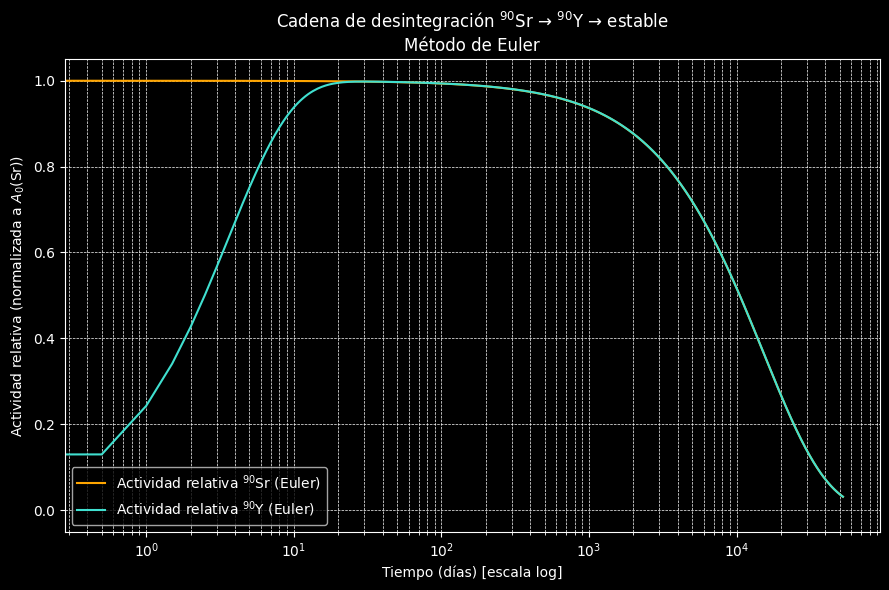

In [43]:
tau_sr_años = 28.78
tau_Y_dias   = 2.67


diasxaño = 365.25
tau_sr_dias = tau_sr_años * diasxaño # Conversión tau de Sr a días

# Constantes de decaimiento
lambda_Sr = np.log(2) / tau_sr_dias
lambda_Y  = np.log(2) / tau_Y_dias

#condiciones iniciales
N0_Sr = 1.0
N0_Y  = 0.0
A0_Sr = lambda_Sr * N0_Sr
t_max = 5 * tau_sr_dias

dt = 0.5 # Paso de integración (días)

# Número de pasos
n_pasos = int(np.ceil(t_max / dt)) + 1
t = np.linspace(0, dt*(n_pasos-1), n_pasos)

N_Sr = np.zeros(n_pasos)
N_Y  = np.zeros(n_pasos)
A_Sr = np.zeros(n_pasos)
A_Y  = np.zeros(n_pasos)

# Condiciones iniciales
N_Sr[0] = N0_Sr
N_Y[0]  = N0_Y
A_Sr[0] = lambda_Sr * N_Sr[0]
A_Y[0]  = lambda_Y  * N_Y[0]


for i in range(1, n_pasos):
    dN_Sr = -lambda_Sr * N_Sr[i-1]
    dN_Y  =  lambda_Sr * N_Sr[i-1] - lambda_Y * N_Y[i-1]

    N_Sr[i] = N_Sr[i-1] + dt * dN_Sr
    N_Y[i]  = N_Y[i-1]  + dt * dN_Y

    A_Sr[i] = lambda_Sr * N_Sr[i]
    A_Y[i]  = lambda_Y  * N_Y[i]

A_Sr_rel = A_Sr / A0_Sr
A_Y_rel  = A_Y  / A0_Sr

# grafica
plt.style.use('dark_background')
plt.figure(figsize=(9,6))
plt.plot(t, A_Sr_rel, label='Actividad relativa $^{90}$Sr (Euler)', color ='orange')
plt.plot(t, A_Y_rel, label='Actividad relativa $^{90}$Y (Euler)', color = 'turquoise')
plt.xscale('log')  # Escala logarítmica en el eje del tiempo
plt.xlabel('Tiempo (días) [escala log]')
plt.ylabel('Actividad relativa (normalizada a $A_0$(Sr))')
plt.title('Cadena de desintegración $^{90}$Sr → $^{90}$Y → estable\nMétodo de Euler')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()


# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

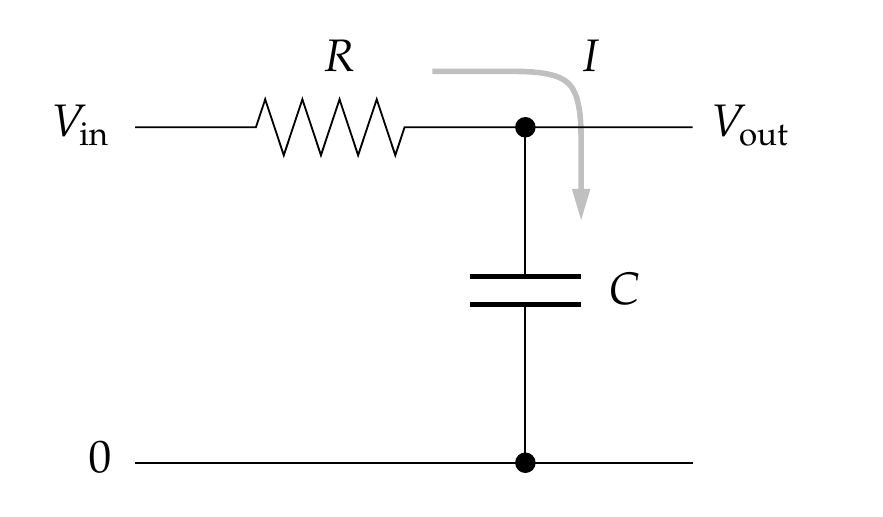

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

Vout(t=10s) para RC=0.01 s → -0.96667


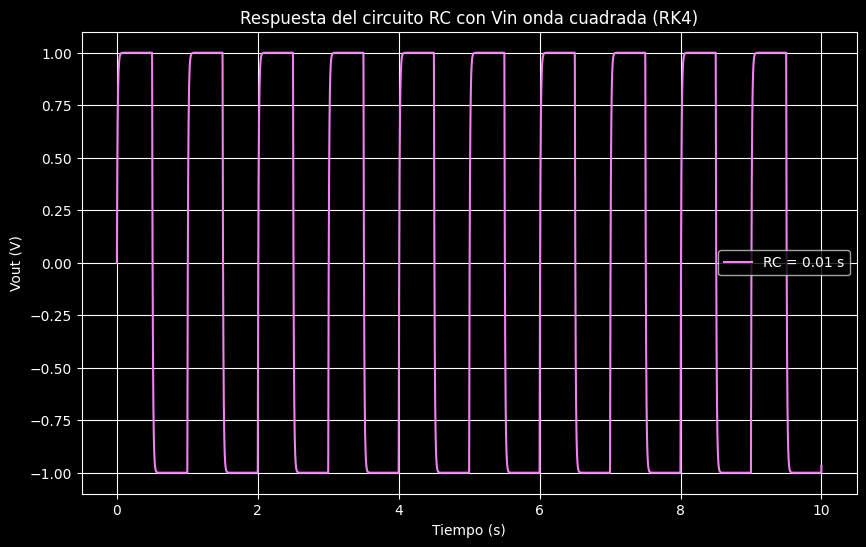

Vout(t=10s) para RC=0.1 s → -0.98330


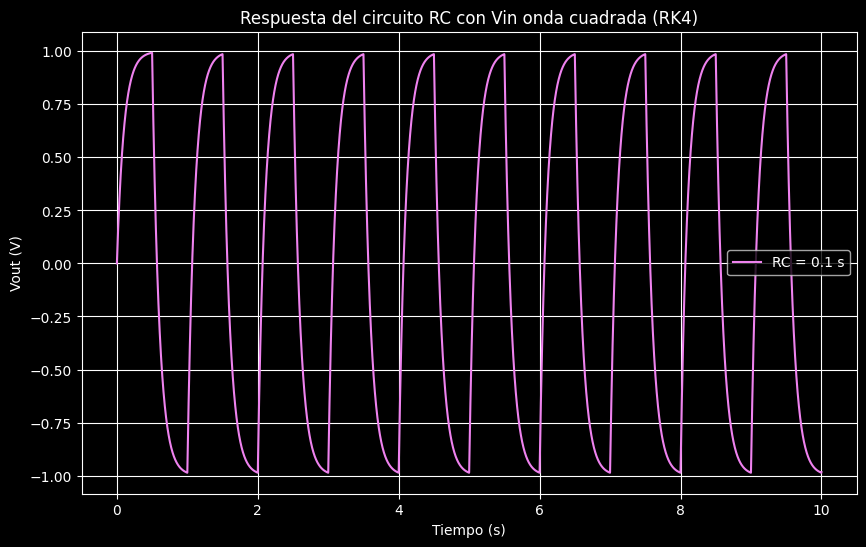

Vout(t=10s) para RC=1.0 s → -0.24470


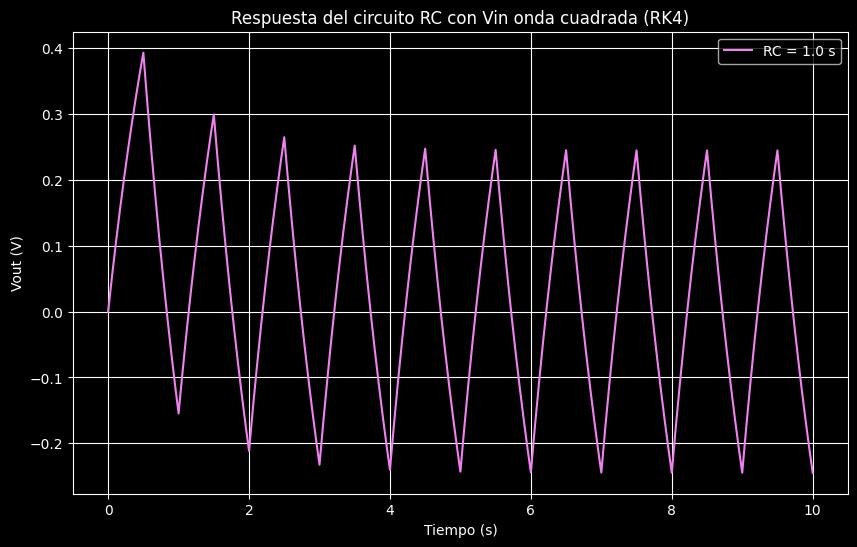

In [44]:
#Parametros
RC_values = [0.01, 0.1, 1.0]
t0 = 0.0
tf = 10.0
dt = 0.001
n_pasos = int((tf - t0) / dt) + 1

t = np.linspace(t0, tf, n_pasos)

def Vin(t):
    return 1.0 if (int(np.floor(2*t)) % 2 == 0) else -1.0

def dVout_dt(t, Vout, RC):
    return (Vin(t) - Vout) / RC

def rk4_RC(RC):
    Vout = np.zeros(n_pasos)
    Vout[0] = 0.0

    for i in range(n_pasos - 1):
        k1 = dVout_dt(t[i], Vout[i], RC)
        k2 = dVout_dt(t[i] + dt/2, Vout[i] + dt*k1/2, RC)
        k3 = dVout_dt(t[i] + dt/2, Vout[i] + dt*k2/2, RC)
        k4 = dVout_dt(t[i] + dt, Vout[i] + dt*k3, RC)
        Vout[i+1] = Vout[i] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

    return Vout
plt.style.use('dark_background')

for RC in RC_values:
    Vout = rk4_RC(RC)
    print(f"Vout(t=10s) para RC={RC} s → {Vout[-1]:.5f}")

    plt.figure(figsize=(10, 6))
    plt.plot(t, Vout, label=f"RC = {RC} s", color = 'violet')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Vout (V)")
    plt.title("Respuesta del circuito RC con Vin onda cuadrada (RK4)")
    plt.legend()
    plt.grid(True)
    plt.show()



# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

Error relativo final Euler: 0.000053
Error relativo final RK4:   0.000000


/tmp/ipython-input-2047296170.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t, P_exact, 'k-', label="Analítica", color='red')
/tmp/ipython-input-2047296170.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, P_euler, 'r--', label="Euler", color='green')
/tmp/ipython-input-2047296170.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-." (-> color='b'). The keyword argument will take precedence.
  plt.plot(t, P_rk4, 'b-.', label="RK4", color='yellow')


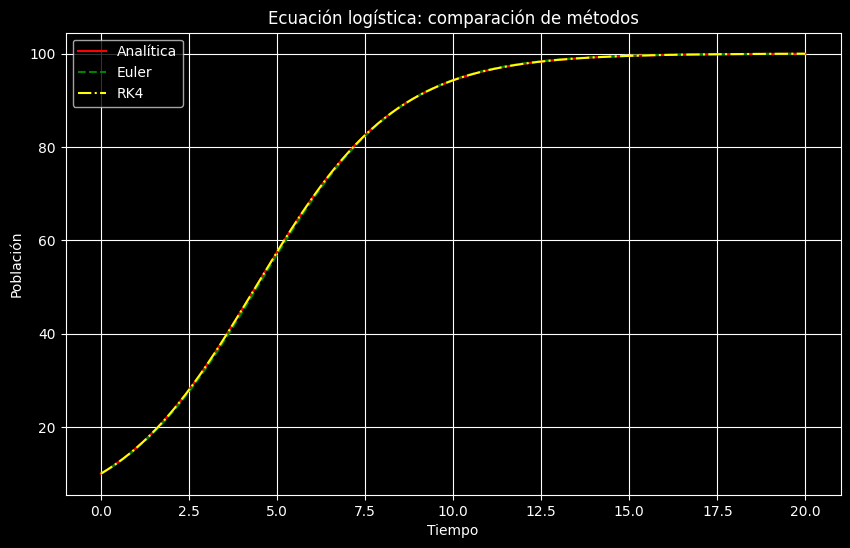

In [45]:
# Ecuación logística
def my_logistic_eq(t, P, r, K):
    dP = r * P * (1 - P / K)
    return dP

# Solución analítica
def logistic_analytic(t, P0, r, K):
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))

# Método de Euler
def euler_method(func, t, P0, r, K):
    P = np.zeros(len(t))
    P[0] = P0
    dt = t[1] - t[0]
    for i in range(len(t) - 1):
        P[i + 1] = P[i] + dt * func(t[i], P[i], r, K)
    return P

# Método de RK4
def rk4_method(func, t, P0, r, K):
    P = np.zeros(len(t))
    P[0] = P0
    dt = t[1] - t[0]
    for i in range(len(t) - 1):
        k1 = func(t[i], P[i], r, K)
        k2 = func(t[i] + dt/2, P[i] + dt*k1/2, r, K)
        k3 = func(t[i] + dt/2, P[i] + dt*k2/2, r, K)
        k4 = func(t[i] + dt, P[i] + dt*k3, r, K)
        P[i + 1] = P[i] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return P

# Parámetros
r = 0.5
K = 100
P0 = 10
t = np.linspace(0, 20, 200)

# Soluciones
P_euler = euler_method(my_logistic_eq, t, P0, r, K)
P_rk4 = rk4_method(my_logistic_eq, t, P0, r, K)
P_exact = logistic_analytic(t, P0, r, K)

# Errores relativos finales
error_euler = np.abs((P_euler - P_exact) / P_exact)
error_rk4 = np.abs((P_rk4 - P_exact) / P_exact)

print(f"Error relativo final Euler: {error_euler[-1]:.6f}")
print(f"Error relativo final RK4:   {error_rk4[-1]:.6f}")

# Gráfica única
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(t, P_exact, 'k-', label="Analítica", color='red')
plt.plot(t, P_euler, 'r--', label="Euler", color='green')
plt.plot(t, P_rk4, 'b-.', label="RK4", color='yellow')
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Ecuación logística: comparación de métodos")
plt.legend()
plt.grid(True)
plt.show()


# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

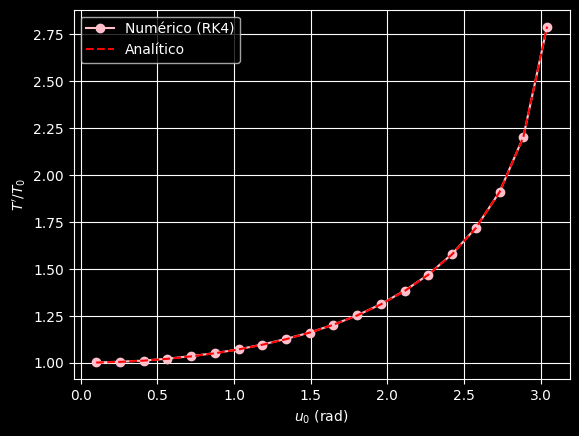

In [46]:
from scipy.integrate import quad

# Parámetros
g = 9.81
l = 1.0

def f(t, y):
    u, w = y
    du_dt = w
    dw_dt = -(g/l) * np.sin(u)
    return np.array([du_dt, dw_dt])

def rk4(f, t0, y0, h, max_t):
    t = [t0]
    y = [np.array(y0)]
    while t[-1] < max_t:
        k1 = f(t[-1], y[-1])
        k2 = f(t[-1] + h/2, y[-1] + h*k1/2)
        k3 = f(t[-1] + h/2, y[-1] + h*k2/2)
        k4 = f(t[-1] + h, y[-1] + h*k3)
        y_next = y[-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t.append(t[-1] + h)
        y.append(y_next)
        if len(t) > 2 and y[-2][0] > 0 and y[-1][0] <= 0:
            break
    return np.array(t), np.array(y)

def periodo_numerico(u0):
    h = 0.001
    max_t = 20
    t, y = rk4(f, 0, [u0, 0], h, max_t)
    return 4 * t[-1]

def K(alpha):
    integrando = lambda z: 1 / np.sqrt((1 - z**2)*(1 - alpha*z**2))
    return quad(integrando, 0, 1)[0]

T0 = 2*np.pi*np.sqrt(l/g)

u0_vals = np.linspace(0.1, np.pi-0.1, 20)
T_num = []
T_ana = []

for u0 in u0_vals:
    Tn = periodo_numerico(u0)
    T_num.append(Tn)
    alpha = np.sin(u0/2)**2
    Ta = T0 * (2/np.pi) * K(alpha)
    T_ana.append(Ta)

# Gráfica
plt.style.use('dark_background')
plt.plot(u0_vals, np.array(T_num)/T0, 'o-', label="Numérico (RK4)", color='pink')
plt.plot(u0_vals, np.array(T_ana)/T0, '--', label="Analítico", color='red')
plt.xlabel(r"$u_0$ (rad)")
plt.ylabel(r"$T'/T_0$")
plt.legend()
plt.grid(True)
plt.show()


# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

Error relativo final (Euler vs RK4): 0.273461
Error relativo final (RK2 vs RK4):   0.003844


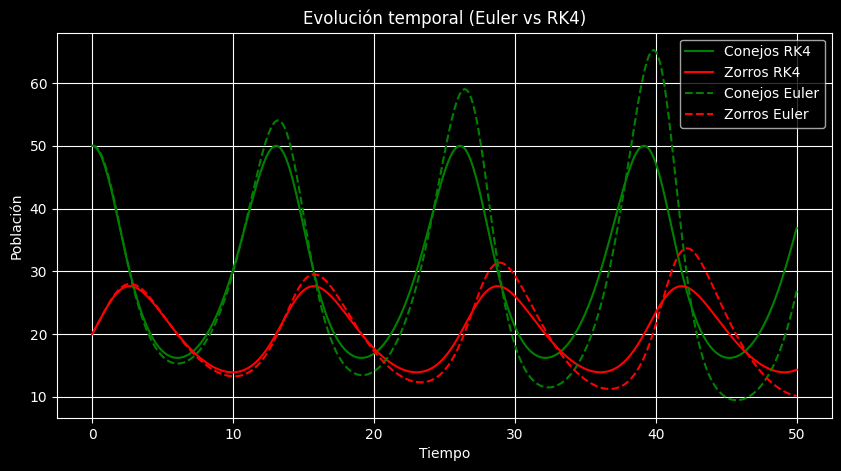

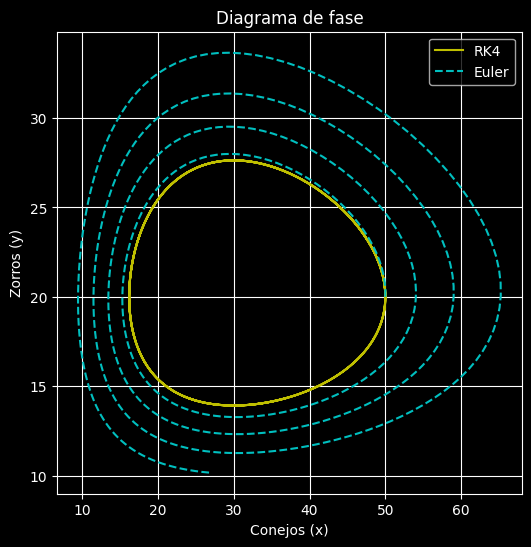

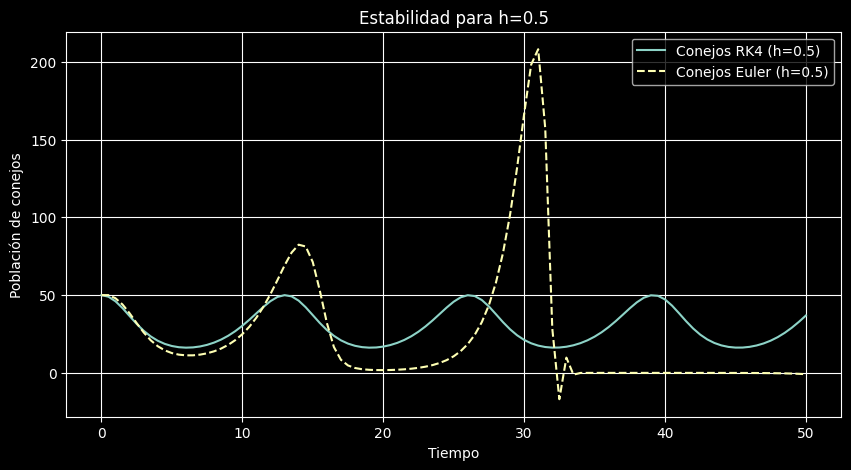


--- h = 0.5 ---
Euler puede volverse inestable para pasos grandes (h=0.5) debido a la acumulación de error,
y con pasos pequeños (h=0.05) se aproxima mucho más a RK4, aunque a mayor coste computacional.


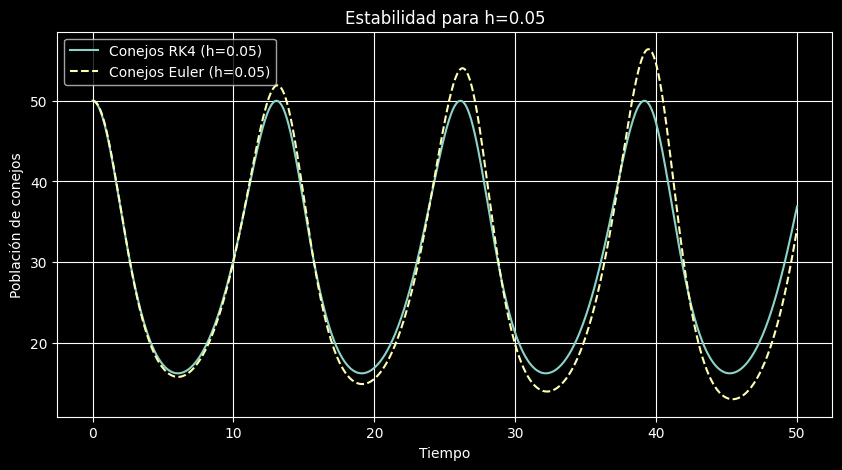


--- h = 0.05 ---
Euler puede volverse inestable para pasos grandes (h=0.5) debido a la acumulación de error,
y con pasos pequeños (h=0.05) se aproxima mucho más a RK4, aunque a mayor coste computacional.


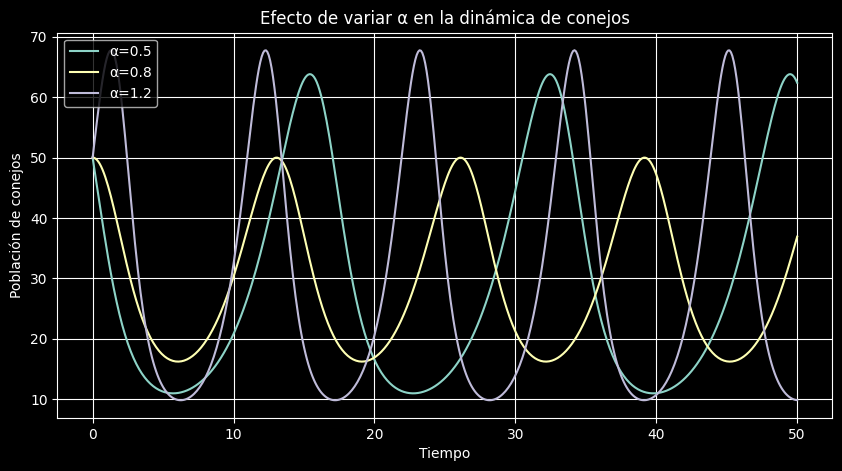

In [47]:

alpha = 0.8
beta  = 0.04
gamma = 0.3
delta = 0.01

x0 = 50
y0 = 20


def f(t, X):
    x, y = X
    dx_dt = alpha * x - beta * x * y
    dy_dt = -gamma * y + delta * x * y
    return np.array([dx_dt, dy_dt])

def euler(f, t, X0, h):
    n = len(t)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for i in range(n-1):
        X[i+1] = X[i] + h * f(t[i], X[i])
    return X

def rk2(f, t, X0, h):
    n = len(t)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for i in range(n-1):
        k1 = f(t[i], X[i])
        k2 = f(t[i] + h/2, X[i] + h*k1/2)
        X[i+1] = X[i] + h * k2
    return X

def rk4(f, t, X0, h):
    n = len(t)
    X = np.zeros((n, len(X0)))
    X[0] = X0
    for i in range(n-1):
        k1 = f(t[i], X[i])
        k2 = f(t[i] + h/2, X[i] + h*k1/2)
        k3 = f(t[i] + h/2, X[i] + h*k2/2)
        k4 = f(t[i] + h, X[i] + h*k3)
        X[i+1] = X[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return X

# ====== a) y b) Resolución con h = 0.1 ======
h = 0.1
t_max = 50
t = np.linspace(0, t_max, int(t_max/h) + 1)

sol_euler = euler(f, t, [x0, y0], h)
sol_rk2   = rk2(f, t, [x0, y0], h)
sol_rk4   = rk4(f, t, [x0, y0], h)

# ====== c) Comparación de métodos ======
error_rel_euler = np.linalg.norm(sol_euler - sol_rk4, axis=1) / np.linalg.norm(sol_rk4, axis=1)
error_rel_rk2   = np.linalg.norm(sol_rk2   - sol_rk4, axis=1) / np.linalg.norm(sol_rk4, axis=1)

print(f"Error relativo final (Euler vs RK4): {error_rel_euler[-1]:.6f}")
print(f"Error relativo final (RK2 vs RK4):   {error_rel_rk2[-1]:.6f}")

# Gráfica evolución temporal
plt.figure(figsize=(10,5))
plt.plot(t, sol_rk4[:,0], 'g-', label='Conejos RK4')
plt.plot(t, sol_rk4[:,1], 'r-', label='Zorros RK4')
plt.plot(t, sol_euler[:,0], 'g--', label='Conejos Euler')
plt.plot(t, sol_euler[:,1], 'r--', label='Zorros Euler')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Evolución temporal (Euler vs RK4)')
plt.legend()
plt.grid(True)
plt.show()

# Diagrama de fase
plt.figure(figsize=(6,6))
plt.plot(sol_rk4[:,0], sol_rk4[:,1], 'y-', label='RK4')
plt.plot(sol_euler[:,0], sol_euler[:,1], 'c--', label='Euler')
plt.xlabel('Conejos (x)')
plt.ylabel('Zorros (y)')
plt.title('Diagrama de fase')
plt.legend()
plt.grid(True)
plt.show()

# ====== d) Análisis de estabilidad ======
for h_test in [0.5, 0.05]:
    t_test = np.linspace(0, t_max, int(t_max/h_test) + 1)
    sol_euler_test = euler(f, t_test, [x0, y0], h_test)
    sol_rk4_test   = rk4(f, t_test, [x0, y0], h_test)

    plt.figure(figsize=(10,5))
    plt.plot(t_test, sol_rk4_test[:,0], label=f'Conejos RK4 (h={h_test})')
    plt.plot(t_test, sol_euler_test[:,0], '--', label=f'Conejos Euler (h={h_test})')
    plt.xlabel('Tiempo')
    plt.ylabel('Población de conejos')
    plt.title(f'Estabilidad para h={h_test}')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\n--- h = {h_test} ---")
    print("Euler puede volverse inestable para pasos grandes (h=0.5) debido a la acumulación de error,")
    print("y con pasos pequeños (h=0.05) se aproxima mucho más a RK4, aunque a mayor coste computacional.")

# ====== e) Variación de parámetros ======
parametros_alpha = [0.5, 0.8, 1.2]
plt.figure(figsize=(10,5))
for a in parametros_alpha:
    alpha = a
    sol = rk4(f, t, [x0, y0], h)
    plt.plot(t, sol[:,0], label=f'α={a}')
plt.xlabel('Tiempo')
plt.ylabel('Población de conejos')
plt.title('Efecto de variar α en la dinámica de conejos')
plt.legend()
plt.grid(True)
plt.show()

alpha = 0.8  # restaurar valor original


# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.



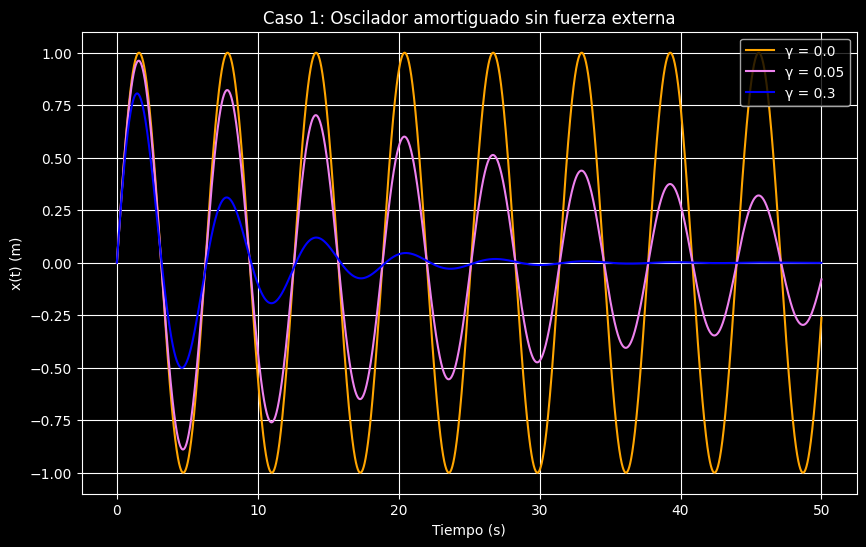

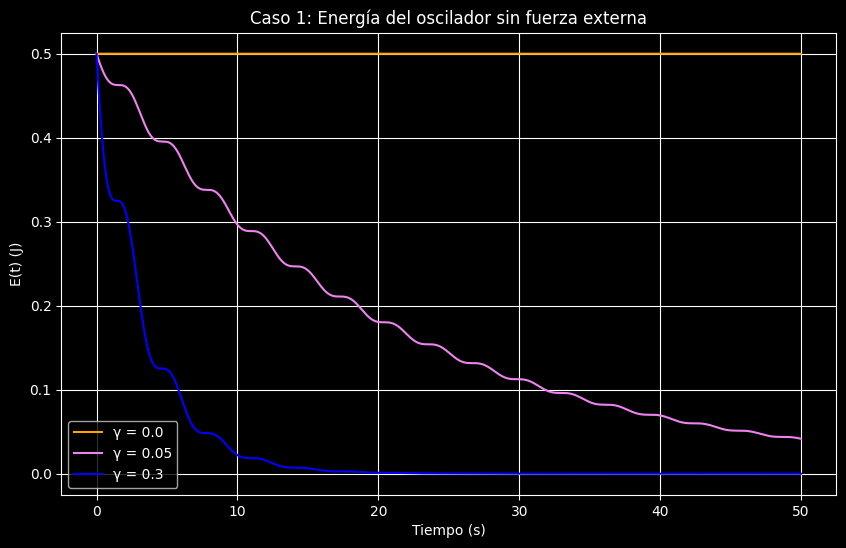

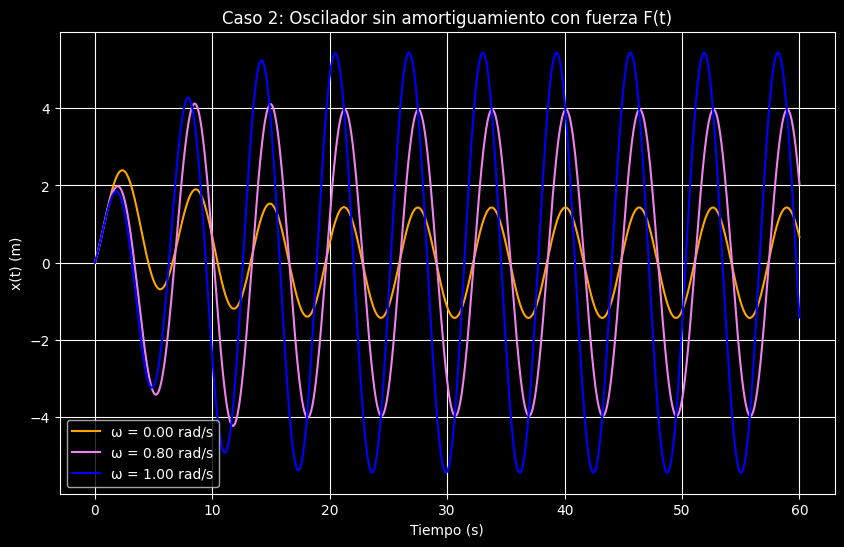

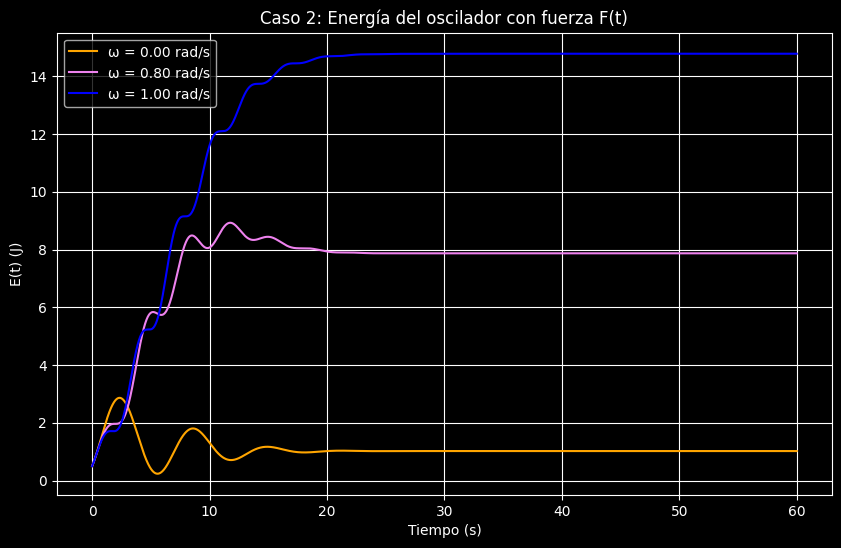

In [48]:
m = 1.0
omega0 = 1.0
k = m * omega0**2
x0 = 0.0
v0 = 1.0

def derivadas(t, state, gamma, fuerza):
    x, v = state
    F = fuerza(t)
    dxdt = v
    dvdt = (F / m) - gamma * v - (omega0**2) * x
    return np.array([dxdt, dvdt])

def integrate_rk4(estado_inicial, t_array, gamma, fuerza):
    n = t_array.size
    sol = np.zeros((n, 2))
    sol[0, :] = estado_inicial
    for i in range(n-1):
        ti = t_array[i]
        h = t_array[i+1] - t_array[i]
        y = sol[i, :]

        k1 = derivadas(ti, y, gamma, fuerza)
        k2 = derivadas(ti + 0.5*h, y + 0.5*h*k1, gamma, fuerza)
        k3 = derivadas(ti + 0.5*h, y + 0.5*h*k2, gamma, fuerza)
        k4 = derivadas(ti + h, y + h*k3, gamma, fuerza)

        sol[i+1, :] = y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return sol

def energia(sol):
    x = sol[:, 0]
    v = sol[:, 1]
    return 0.5 * m * v**2 + 0.5 * k * x**2

# CASO 1: F = 0, gamma = [0, 0.05, 0.3]

t0 = 0.0
t_final1 = 50.0
dt = 0.01
t1 = np.arange(t0, t_final1 + dt, dt)

gamma_vals = [0.0, 0.05, 0.3]
F_zero = lambda t: 0.0

colores = ['orange', 'violet', 'blue']

# Grafica x(t)
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
for i,gamma in enumerate(gamma_vals):
    sol = integrate_rk4([x0, v0], t1, gamma, F_zero)
    plt.plot(t1, sol[:,0], label=f'γ = {gamma}', color=colores[i])
plt.xlabel('Tiempo (s)')
plt.ylabel('x(t) (m)')
plt.title('Caso 1: Oscilador amortiguado sin fuerza externa')
plt.legend()
plt.grid(True)
plt.show()

# Grafica E(t)
plt.figure(figsize=(10,6))
for i,gamma in enumerate(gamma_vals):
    sol = integrate_rk4([x0, v0], t1, gamma, F_zero)
    plt.plot(t1, energia(sol), label=f'γ = {gamma}', color=colores[i])
plt.xlabel('Tiempo (s)')
plt.ylabel('E(t) (J)')
plt.title('Caso 1: Energía del oscilador sin fuerza externa')
plt.legend()
plt.grid(True)
plt.show()

# CASO 2: gamma = 0, F(t) = F0 cos(ωt) exp(-t^2/T^2)

gamma2 = 0.0
F0 = 1.0
T_env = 10.0
omega_vals = [0.0, 0.8*omega0, omega0]

t_final2 = 60.0
t2 = np.arange(t0, t_final2 + dt, dt)

# Graficar x(t)
plt.figure(figsize=(10,6))
for i, omega in enumerate(omega_vals):
    F_func = lambda t, F0=F0, omega=omega, T_env=T_env: F0 * np.cos(omega*t) * np.exp(-(t**2)/(T_env**2))
    sol = integrate_rk4([x0, v0], t2, gamma2, F_func)
    plt.plot(t2, sol[:,0], label=f'ω = {omega:.2f} rad/s', color=colores[i])
plt.xlabel('Tiempo (s)')
plt.ylabel('x(t) (m)')
plt.title('Caso 2: Oscilador sin amortiguamiento con fuerza F(t)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar E(t)
plt.figure(figsize=(10,6))
for i, omega in enumerate(omega_vals):
    F_func = lambda t, F0=F0, omega=omega, T_env=T_env: F0 * np.cos(omega*t) * np.exp(-(t**2)/(T_env**2))
    sol = integrate_rk4([x0, v0], t2, gamma2, F_func)
    plt.plot(t2, energia(sol), label=f'ω = {omega:.2f} rad/s', color=colores[i])
plt.xlabel('Tiempo (s)')
plt.ylabel('E(t) (J)')
plt.title('Caso 2: Energía del oscilador con fuerza F(t)')
plt.legend()
plt.grid(True)
plt.show()


# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

In [49]:
from numpy.linalg import eig

def derivadas_potencial(mu, punto_lagrange):
    x, y = punto_lagrange
    x1, y1 = -mu, 0
    x2, y2 = 1 - mu, 0

    r1 = np.sqrt((x - x1)**2 + (y - y1)**2)
    r2 = np.sqrt((x - x2)**2 + (y - y2)**2)

    a = 1 - (1 - mu) * (1 / r1**3 - 3 * (x - x1)**2 / r1**5) \
          - mu       * (1 / r2**3 - 3 * (x - x2)**2 / r2**5)

    b = 3 * (1 - mu) * (x - x1) * (y - y1) / r1**5 \
        + 3 * mu       * (x - x2) * (y - y2) / r2**5

    c = b
    d = 1 - (1 - mu) * (1 / r1**3 - 3 * (y - y1)**2 / r1**5) \
          - mu       * (1 / r2**3 - 3 * (y - y2)**2 / r2**5)

    return a, b, c, d

#Matriz
def matriz_A(mu, punto_lagrange, omega=1.0):
    a, b, c, d = derivadas_potencial(mu, punto_lagrange)
    return np.array([
        [0, 1, 0, 0],
        [a, 0, b, 2*omega],
        [0, 0, 0, 1],
        [c, -2*omega, d, 0]
    ], dtype=float)


# 3. Valores propios y estabilidad
def estabilidad(mu, punto_lagrange):
    vals = eig(matriz_A(mu, punto_lagrange))[0]
    return vals

def es_estable(vals):
    return np.all(np.abs(np.real(vals)) < 1e-8)

def L4(mu):
    return (0.5 - mu, np.sqrt(3)/2)

def L5(mu):
    return (0.5 - mu, -np.sqrt(3)/2)



Valores propios y análisis de estabilidad

--- μ = 3e-06 ---
L4:
  Valores propios = [ 1.11022302e-15+0.99998987j  1.11022302e-15-0.99998987j
 -7.84650191e-16+0.00450004j -7.84650191e-16-0.00450004j]
  Estable: True
L5:
  Valores propios = [-1.11022302e-15+0.99998987j -1.11022302e-15-0.99998987j
  7.84650191e-16+0.00450004j  7.84650191e-16-0.00450004j]
  Estable: True

--- μ = 0.000954 ---
L4:
  Valores propios = [ 4.99600361e-16+0.9967571j   4.99600361e-16-0.9967571j
 -1.70043558e-16+0.08046916j -1.70043558e-16-0.08046916j]
  Estable: True
L5:
  Valores propios = [-4.99600361e-16+0.9967571j  -4.99600361e-16-0.9967571j
  1.70043558e-16+0.08046916j  1.70043558e-16-0.08046916j]
  Estable: True

--- μ = 0.03852 ---
L4:
  Valores propios = [-5.87169202e-14+0.70877592j -5.87169202e-14-0.70877592j
  5.91158456e-14+0.70543369j  5.91158456e-14-0.70543369j]
  Estable: True
L5:
  Valores propios = [ 5.87446758e-14+0.70877592j  5.87446758e-14-0.70877592j
 -5.91072330e-14+0.70543369j -5.91072330e-

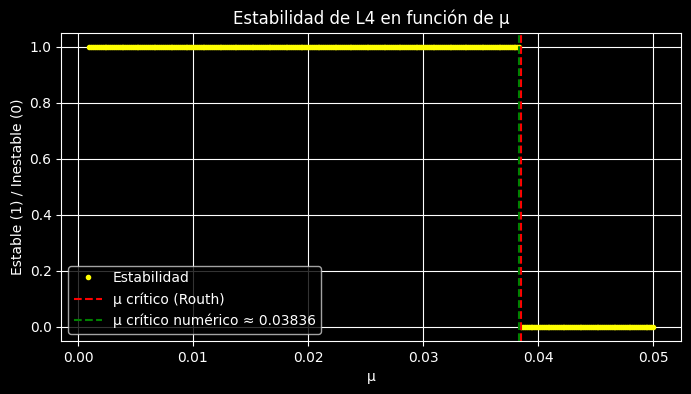

Estabilidad para casos reales

Caso: Sol–Tierra (μ = 3e-06)
  L4: Estable = True
  L5: Estable = True

Caso: Sol–Júpiter (μ = 0.000954)
  L4: Estable = True
  L5: Estable = True


In [50]:
if __name__ == "__main__":


    print("Valores propios y análisis de estabilidad")
    mu_ejemplos = [3e-6, 9.54e-4, 0.03852]
    for mu in mu_ejemplos:
        print(f"\n--- μ = {mu} ---")
        for nombre, punto in [("L4", L4(mu)), ("L5", L5(mu))]:
            vp = estabilidad(mu, punto)
            print(f"{nombre}:")
            print(f"  Valores propios = {vp}")
            print(f"  Estable: {es_estable(vp)}")

    print("Determinación de μ crítico y comparación con Routh")

    mu_vals = np.linspace(0.001, 0.05, 300)
    estabilidades = []
    for mu in mu_vals:
        vp = estabilidad(mu, L4(mu))
        estabilidades.append(es_estable(vp))

    cambios = np.where(np.diff(estabilidades))[0]
    if len(cambios) > 0:
        mu_critico = mu_vals[cambios[0]]
        print(f"μ crítico numérico ≈ {mu_critico}")
    else:
        mu_critico = None
        print("No se detectó cambio en el rango μ dado.")
    print("μ crítico teórico (Routh) ≈ 0.03852")


    plt.figure(figsize=(8, 4))
    plt.style.use('dark_background')
    plt.plot(mu_vals, estabilidades, 'o', markersize=3, label="Estabilidad", color='yellow')
    plt.axvline(0.03852, color='r', linestyle='--', label="μ crítico (Routh)")
    if mu_critico:
        plt.axvline(mu_critico, color='g', linestyle='--', label=f"μ crítico numérico ≈ {mu_critico:.5f}")
    plt.xlabel("μ")
    plt.ylabel("Estable (1) / Inestable (0)")
    plt.title("Estabilidad de L4 en función de μ")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Estabilidad para casos reales")
    casos = {
        "Sol–Tierra": 3e-6,
        "Sol–Júpiter": 9.54e-4
    }
    for nombre_caso, mu in casos.items():
        print(f"\nCaso: {nombre_caso} (μ = {mu})")
        for nombre, punto in [("L4", L4(mu)), ("L5", L5(mu))]:
            vp = estabilidad(mu, punto)
            print(f"  {nombre}: Estable = {es_estable(vp)}")


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  



=== κ = 0.5 ===
Valores propios: [0.+0.5j 0.-0.5j]
→ Sistema estable (oscilaciones puras)


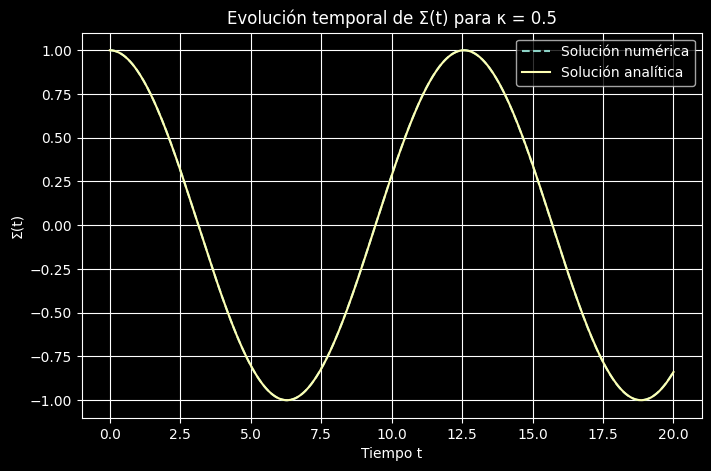


=== κ = 1.0 ===
Valores propios: [0.+1.j 0.-1.j]
→ Sistema estable (oscilaciones puras)


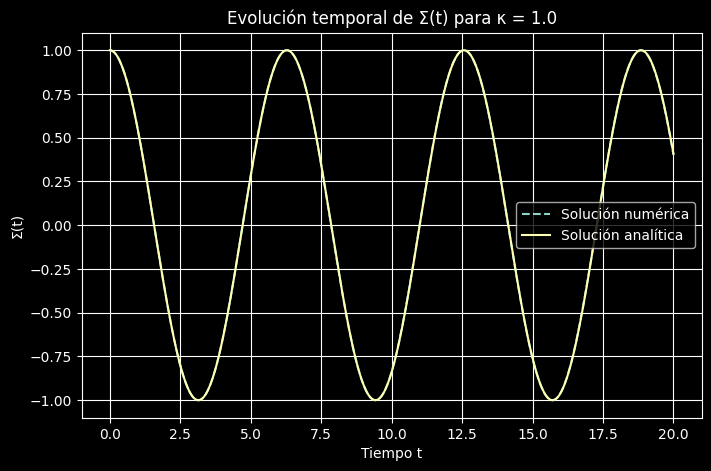


=== κ = 2.0 ===
Valores propios: [0.+2.j 0.-2.j]
→ Sistema estable (oscilaciones puras)


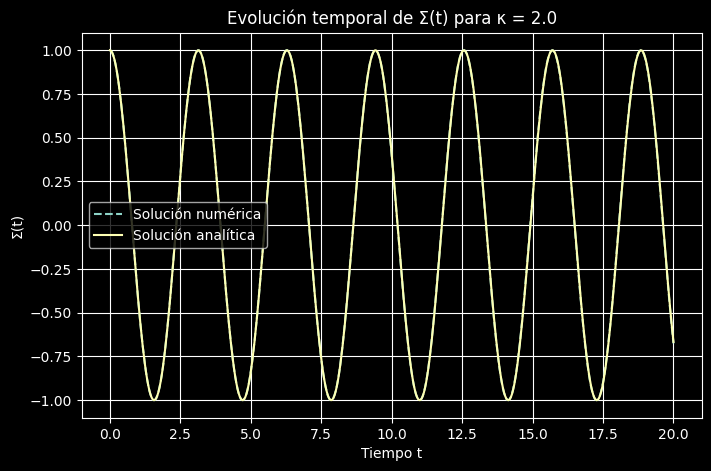

In [51]:
from scipy.integrate import solve_ivp

Sigma0 = 1.0
Sigma_p0 = 0.0
t_max = 20
N_puntos = 500
kappa_valores = [0.5, 1.0, 2.0]

def matriz_A(kappa):
    return np.array([[0, 1],
                     [-kappa**2, 0]])

def solucion_analitica(t, kappa):
    return Sigma0 * np.cos(kappa * t) + (Sigma_p0 / kappa) * np.sin(kappa * t)

for kappa in kappa_valores:
    # 1) Valores propios
    A = matriz_A(kappa)
    valores_propios = np.linalg.eigvals(A)
    print(f"\n=== κ = {kappa} ===")
    print("Valores propios:", valores_propios)
    if np.all(np.real(valores_propios) == 0):
        print("→ Sistema estable (oscilaciones puras)")
    elif np.any(np.real(valores_propios) > 0):
        print("→ Sistema inestable (crecimiento exponencial)")
    else:
        print("→ Sistema estable asintóticamente (decay exponencial)")

    # 2) Solución numérica con solve_ivp
    def sistema(t, Y):
        Sigma, Sigma_p = Y
        return [Sigma_p, -kappa**2 * Sigma]

    t_eval = np.linspace(0, t_max, N_puntos)
    sol_num = solve_ivp(sistema, [0, t_max], [Sigma0, Sigma_p0], t_eval=t_eval)

    # 3) Solución analítica
    Sigma_ana = solucion_analitica(t_eval, kappa)

    # 4) Graficar comparación
    plt.figure(figsize=(8, 5))
    plt.plot(t_eval, sol_num.y[0], '--', label="Solución numérica")
    plt.plot(t_eval, Sigma_ana, '-', label="Solución analítica")
    plt.title(f"Evolución temporal de Σ(t) para κ = {kappa}")
    plt.xlabel("Tiempo t")
    plt.ylabel("Σ(t)")
    plt.legend()
    plt.grid(True)
    plt.show()


# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

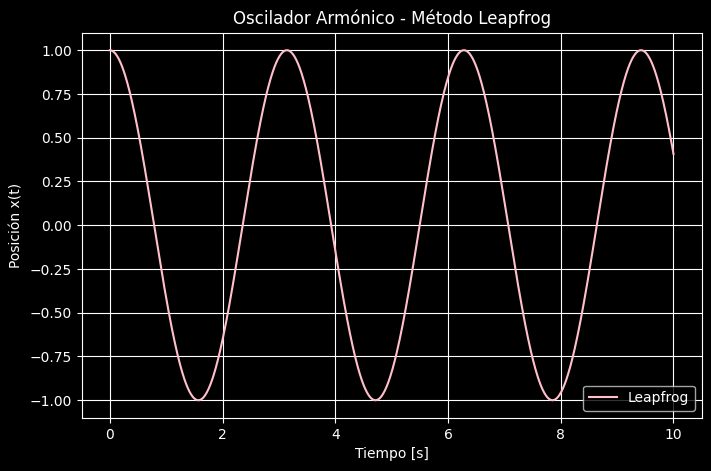

In [52]:
omega = 2.0
dt = 0.01
t_max = 10.0
x0 = 1.0
v0 = 0.0

def f(x):
    return -omega**2 * x

t = np.arange(0, t_max + dt, dt)
N = len(t)

x = np.zeros(N)
v = np.zeros(N)

x[0] = x0
v_half = v0 + 0.5 * f(x0) * dt

for n in range(N - 1):
    x[n + 1] = x[n] + v_half * dt
    v_half = v_half + f(x[n + 1]) * dt

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(t, x, label="Leapfrog", color="pink")
plt.xlabel("Tiempo [s]")
plt.ylabel("Posición x(t)")
plt.title("Oscilador Armónico - Método Leapfrog")
plt.grid(True)
plt.legend()
plt.show()
